In [1]:
import sys
sys.path.append('..')
from vis.visualization import visualize_activation, visualize_saliency, overlay
from vis.utils import utils
from keras import activations
from matplotlib import pyplot as plt
from keras import backend as K
import numpy as np
from src.data_prepare import *
from src.model_utils_keras import load_model_history
from vis.visualization import visualize_cam
from keras.preprocessing import image
from keras import models
import cv2
import matplotlib.cm as cm
from vis.visualization import visualize_cam

/home/cugtyt/software/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
image_path = ['../../data/Asian/AF0301_1100_00F.jpg', '../../data/Asian/AF0303_1110_45L.jpg', '../../data/Asian/AF0304_1101_NE.jpg']
# img = image.load_img(image_path, target_size=(128, 128))
# img_tensor = np.expand_dims(image.img_to_array(img), axis=0) / 255

In [18]:
model, history = load_model_history('densenet_keras2')

/home/cugtyt/software/miniconda3/lib/python3.6/site-packages/keras/models.py:291: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [21]:
np.argmax(model.predict(np.expand_dims(image.img_to_array(image.load_img(image_path[2], target_size=(128, 128))), axis=0) / 255))

3

In [38]:
def show_heatmap(model, img, path, layer_name, save_name):
    model.predict(img)
    img_output = model.output[:, 0]
    last_conv_layer = model.get_layer(layer_name)
    grads = K.gradients(img_output, last_conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([img])
    for i in range(grads.shape[3]):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    
    # We use cv2 to load the original image
    img_cv = cv2.imread(path)
    # We resize the heatmap to have the same size as the original image
    result = cv2.resize(heatmap, (img_cv.shape[1], img_cv.shape[0]))
    # We convert the heatmap to RGB
    result = np.uint8(255 * result)
    # We apply the heatmap to the original image
    result = cv2.applyColorMap(result, cv2.COLORMAP_JET)
    # 0.4 here is a heatmap intensity factor
    result = result * 0.4 + img_cv
    cv2.imwrite(f'./visualizing_imgs/{save_name}.jpg', result)

    result = cv2.imread(f'./visualizing_imgs/{save_name}.jpg')
    
    fig, axarr = plt.subplots(1, 3, figsize=(12, 4))
    axarr[0].imshow(img[0])
    axarr[0].axis('off')
    axarr[1].matshow(heatmap)
    axarr[1].axis('off')
    axarr[2].imshow(result)
    axarr[2].axis('off')

/home/cugtyt/software/miniconda3/lib/python3.6/site-packages/keras/models.py:291: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


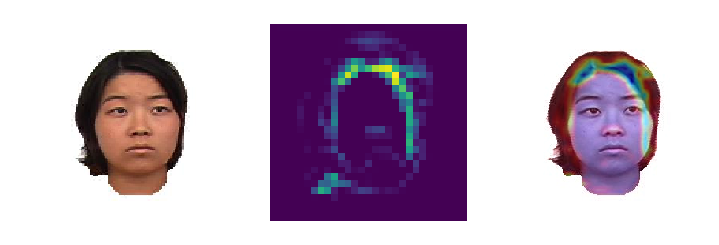

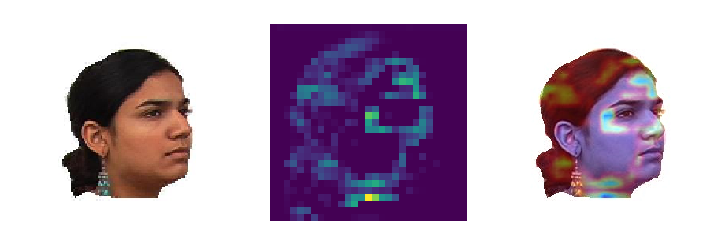

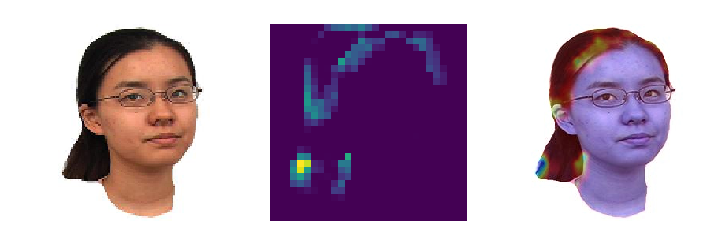

In [47]:
model, history = load_model_history('vanilla_adam_keras')

for path in image_path:
    img_tensor = image.load_img(path, target_size=(128, 128))
    img_tensor = np.expand_dims(image.img_to_array(img_tensor), axis=0) / 255
    show_heatmap(model, img_tensor, path, 'conv2d_21', 'vanilla_adam_keras')

/home/cugtyt/software/miniconda3/lib/python3.6/site-packages/keras/models.py:291: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


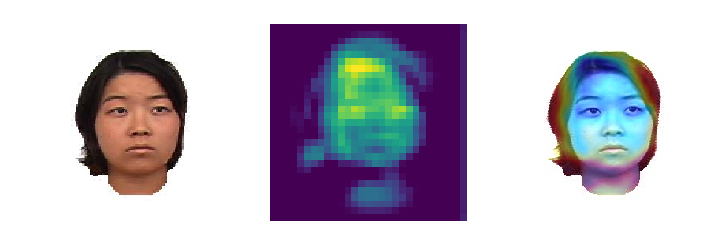

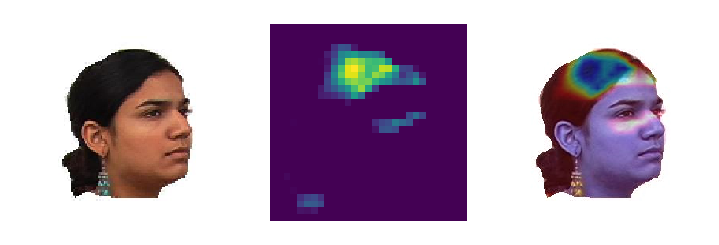

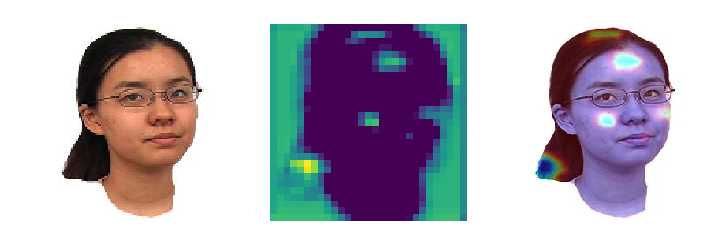

In [48]:
model, history = load_model_history('resnet_keras2')

for path in image_path:
    img_tensor = image.load_img(path, target_size=(128, 128))
    img_tensor = np.expand_dims(image.img_to_array(img_tensor), axis=0) / 255
    show_heatmap(model, img_tensor, path, 'conv2d_9', 'resnet_keras2')

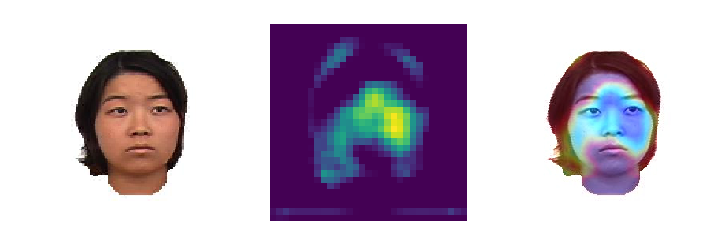

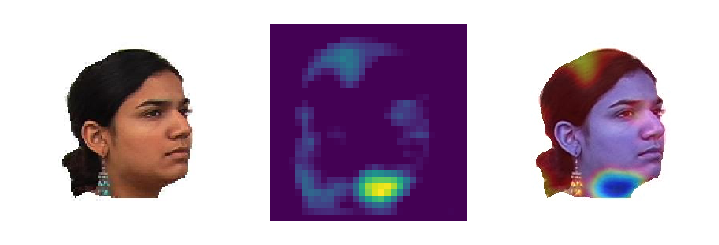

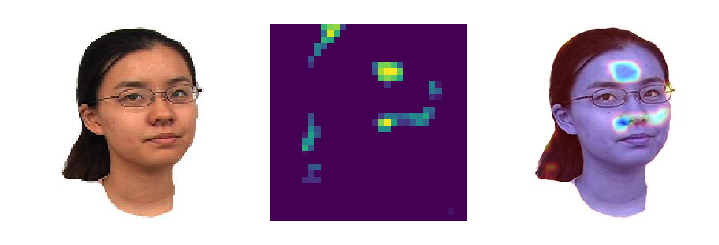

In [49]:
model, history = load_model_history('resnet_keras_reduced')

for path in image_path:
    img_tensor = image.load_img(path, target_size=(128, 128))
    img_tensor = np.expand_dims(image.img_to_array(img_tensor), axis=0) / 255
    show_heatmap(model, img_tensor, path, 'conv2d_8', 'resnet_keras_reduced')

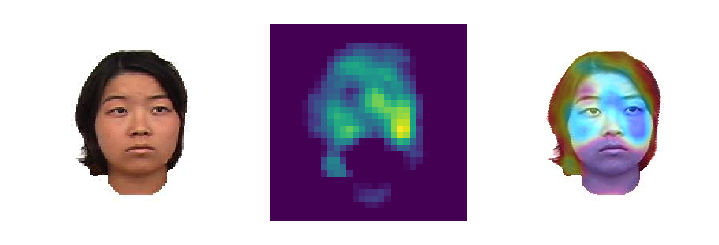

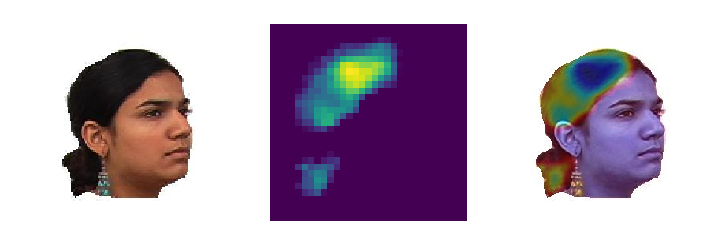

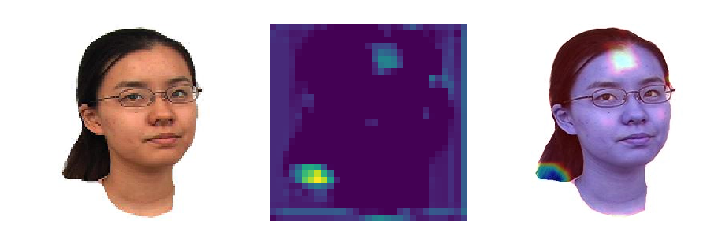

In [50]:
model, history = load_model_history('resnet_keras_reduced2')

for path in image_path:
    img_tensor = image.load_img(path, target_size=(128, 128))
    img_tensor = np.expand_dims(image.img_to_array(img_tensor), axis=0) / 255
    show_heatmap(model, img_tensor, path, 'conv2d_6', 'resnet_keras_reduced2')

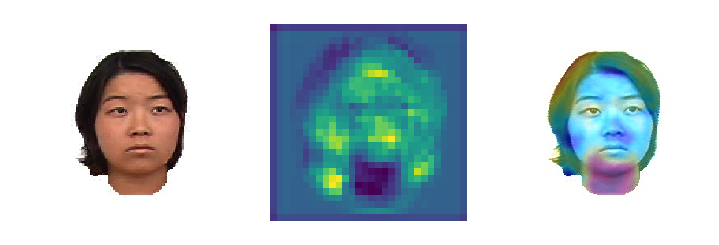

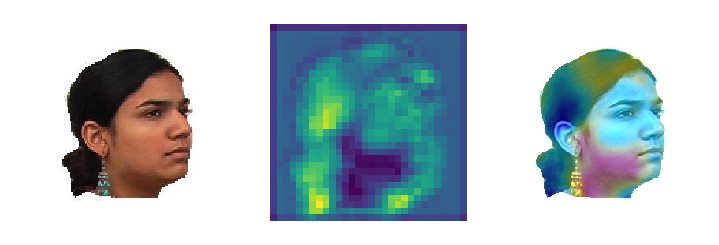

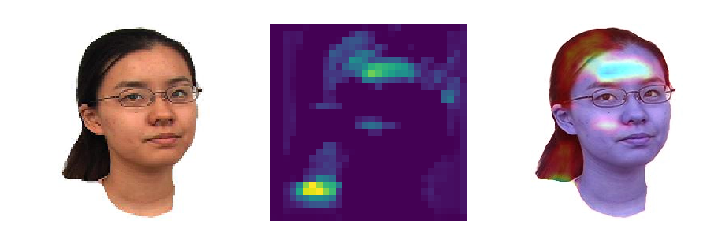

In [51]:
model, history = load_model_history('resnet_keras_reduced3')

for path in image_path:
    img_tensor = image.load_img(path, target_size=(128, 128))
    img_tensor = np.expand_dims(image.img_to_array(img_tensor), axis=0) / 255
    show_heatmap(model, img_tensor, path, 'conv2d_36', 'resnet_keras_reduced3')

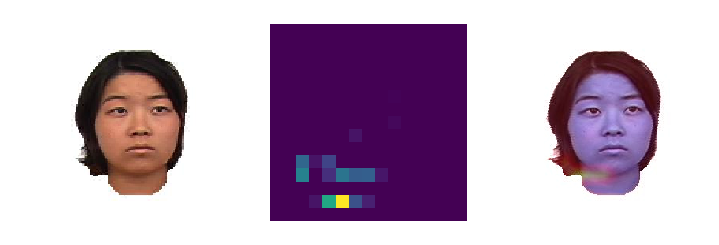

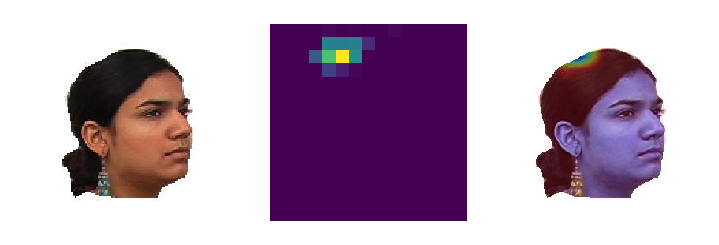

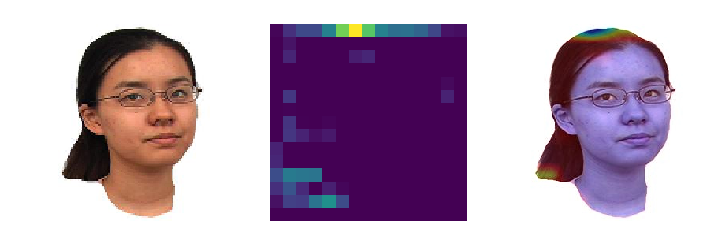

In [52]:
model, history = load_model_history('resnet_keras_reduced4')

for path in image_path:
    img_tensor = image.load_img(path, target_size=(128, 128))
    img_tensor = np.expand_dims(image.img_to_array(img_tensor), axis=0) / 255
    show_heatmap(model, img_tensor, path, 'conv2d_55', 'resnet_keras_reduced4')

/home/cugtyt/software/miniconda3/lib/python3.6/site-packages/keras/models.py:291: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


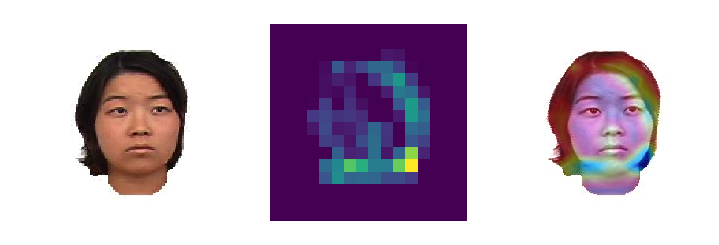

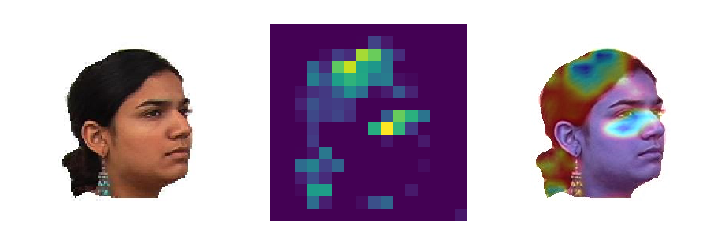

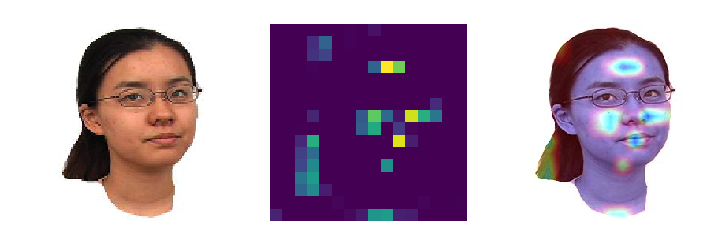

In [53]:
model, history = load_model_history('densenet_keras2')

for path in image_path:
    img_tensor = image.load_img(path, target_size=(128, 128))
    img_tensor = np.expand_dims(image.img_to_array(img_tensor), axis=0) / 255
    show_heatmap(model, img_tensor, path, 'conv2d_7', 'densenet_keras2')

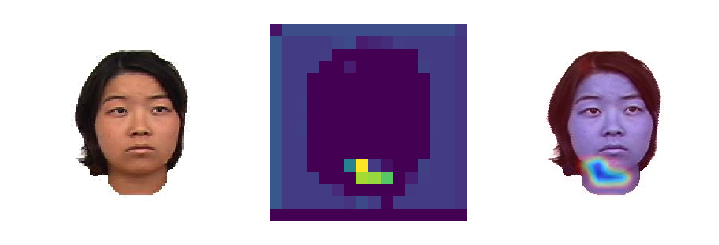

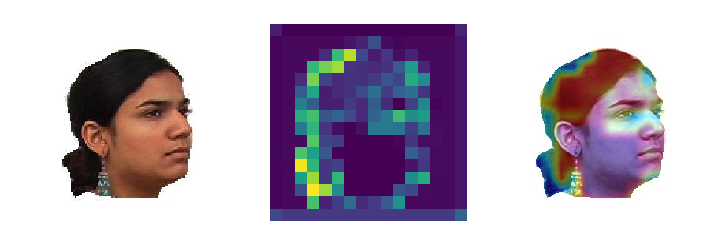

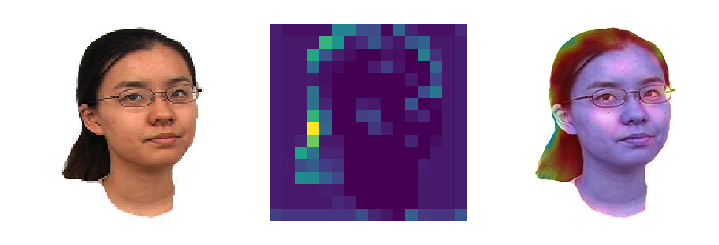

In [54]:
model, history = load_model_history('densenet_keras_reduced')

for path in image_path:
    img_tensor = image.load_img(path, target_size=(128, 128))
    img_tensor = np.expand_dims(image.img_to_array(img_tensor), axis=0) / 255
    show_heatmap(model, img_tensor, path, 'conv2d_16', 'densenet_keras_reduced')

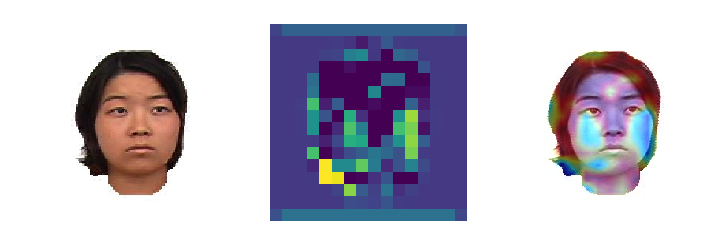

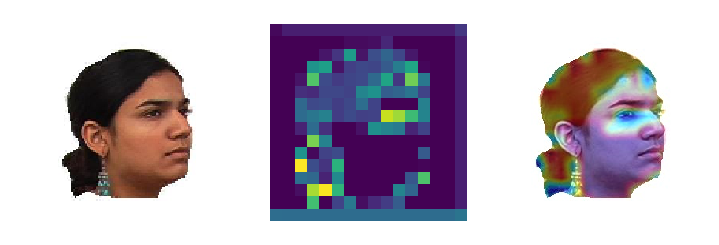

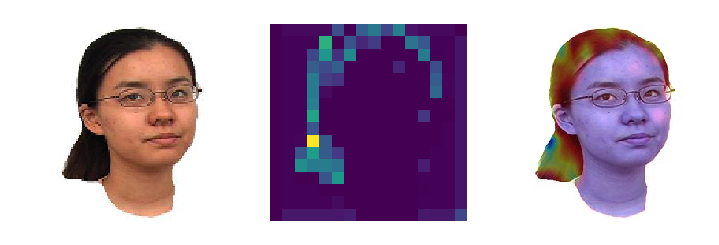

In [55]:
model, history = load_model_history('densenet_keras_reduced2')

for path in image_path:
    img_tensor = image.load_img(path, target_size=(128, 128))
    img_tensor = np.expand_dims(image.img_to_array(img_tensor), axis=0) / 255
    show_heatmap(model, img_tensor, path, 'conv2d_23', 'densenet_keras_reduced2')

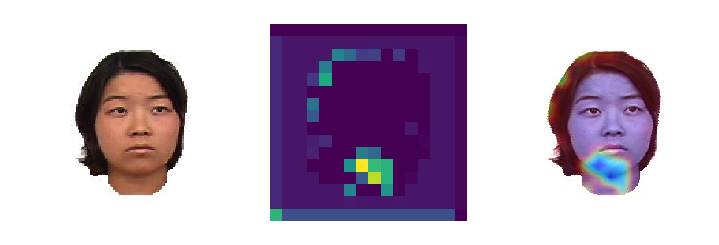

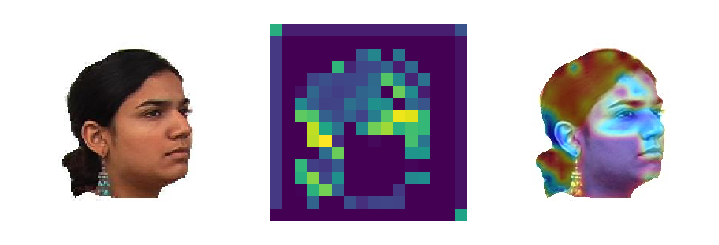

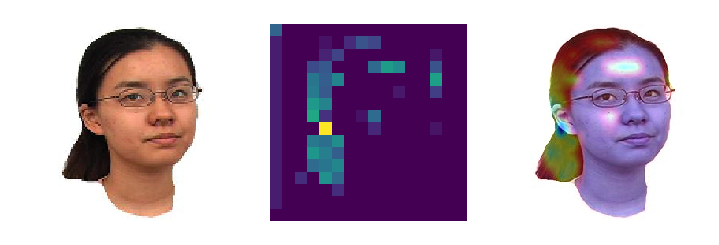

In [56]:
model, history = load_model_history('densenet_keras_reduced3')

for path in image_path:
    img_tensor = image.load_img(path, target_size=(128, 128))
    img_tensor = np.expand_dims(image.img_to_array(img_tensor), axis=0) / 255
    show_heatmap(model, img_tensor, path, 'conv2d_37', 'densenet_keras_reduced3')

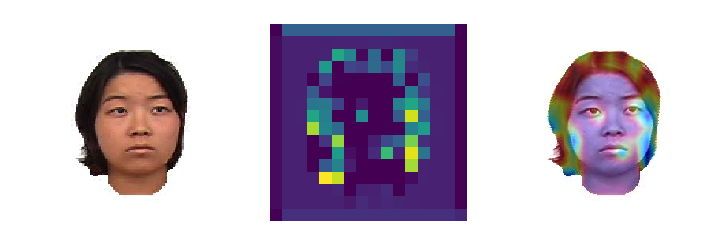

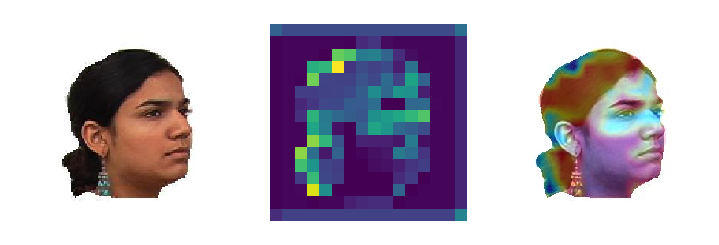

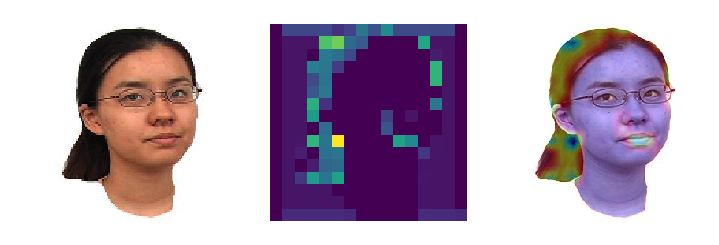

In [57]:
model, history = load_model_history('densenet_keras_reduced4')

for path in image_path:
    img_tensor = image.load_img(path, target_size=(128, 128))
    img_tensor = np.expand_dims(image.img_to_array(img_tensor), axis=0) / 255
    show_heatmap(model, img_tensor, path, 'conv2d_49', 'densenet_keras_reduced4')

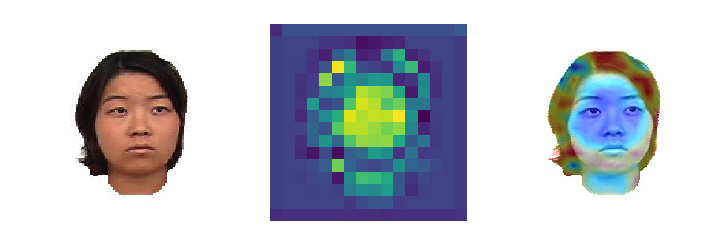

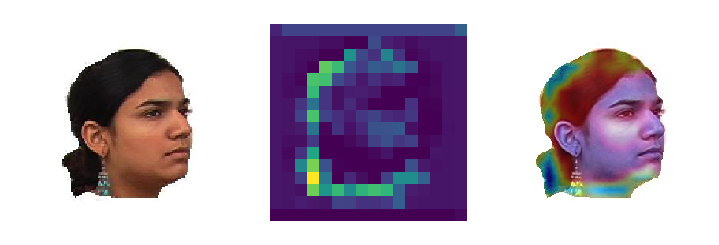

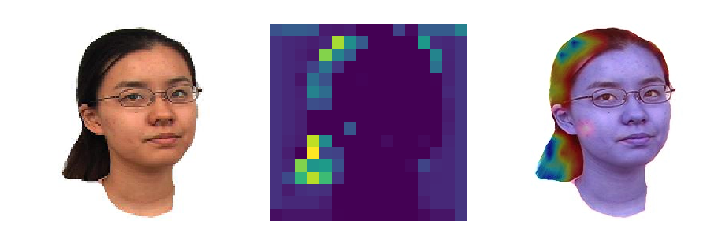

In [58]:
model, history = load_model_history('densenet_keras_reduced5')

for path in image_path:
    img_tensor = image.load_img(path, target_size=(128, 128))
    img_tensor = np.expand_dims(image.img_to_array(img_tensor), axis=0) / 255
    show_heatmap(model, img_tensor, path, 'conv2d_60', 'densenet_keras_reduced5')